In [1]:
from cirq_qubitization.quantum_graph.musical_score import *
from cirq_qubitization.quantum_graph.composite_bloq_test import *

In [2]:
from cirq_qubitization.jupyter_tools import show_bloq

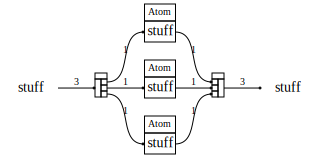

In [3]:
bloq = TestParallelBloq().decompose_bloq()
show_bloq(bloq)

(<Figure size 700x500 with 1 Axes>, <AxesSubplot: >)

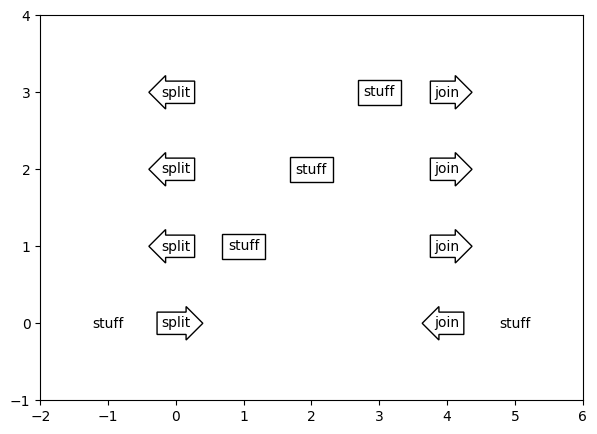

In [4]:
draw(bloq)

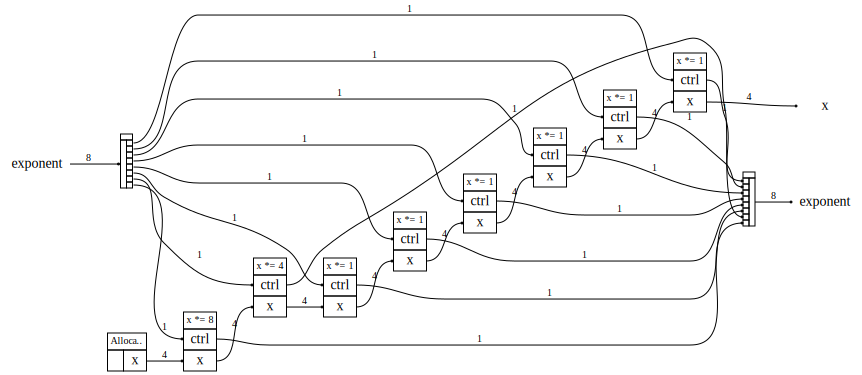

In [5]:
from cirq_qubitization.bloq_algos.shors.shors import ModExp
N = 3*5
n = int(np.ceil(np.log2(N)))
g = 8

bloq = ModExp.make_for_shor(big_n=N, g=g).decompose_bloq()
show_bloq(bloq)

(<Figure size 700x500 with 1 Axes>, <AxesSubplot: >)

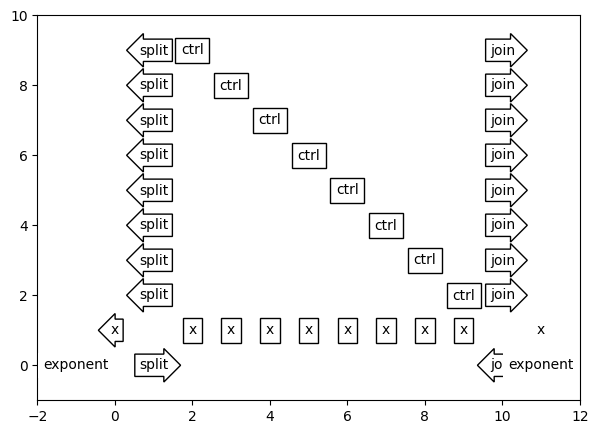

In [6]:
draw(bloq)

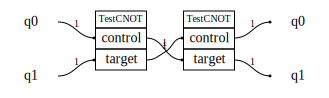

In [7]:
from cirq_qubitization.quantum_graph.bloq_test import TestCNOT
bloq = TestCNOT()
# Wire up (way 2)
bb = CompositeBloqBuilder()
q0 = bb.add_register('q0', 1)
q1 = bb.add_register('q1', 1)
q0, q1 = bb.add(bloq, control=q0, target=q1)
q0, q1 = bb.add(bloq, control=q1, target=q0) ## !!
cbloq = bb.finalize(q0=q0, q1=q1)
bloq = cbloq
show_bloq(bloq)

In [ ]:
draw()

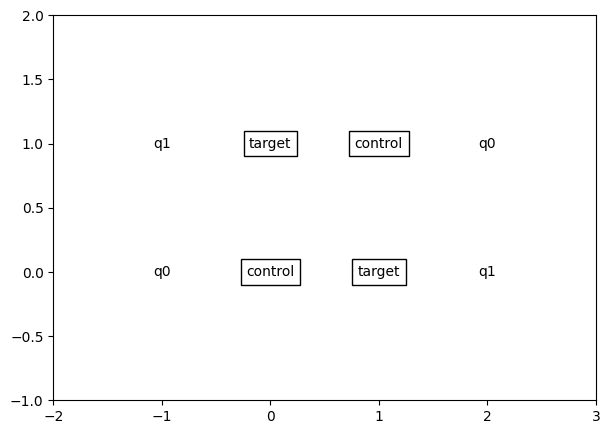

In [30]:
layers, assign = cbloq_musical_score(bloq.registers, bloq._binst_graph)
fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlim((-2, len(bloq.bloq_instances)+1))
ax.set_ylim((min(assign.values())-1, max(assign.values())+1))

for soq in bloq.all_soquets:
    y = assign[soq]
    if soq.binst is LeftDangle:
        x = -1
    elif soq.binst is RightDangle:
        x = len(bloq.bloq_instances)
    else:
        x = soq.binst.i
        
    if soq.binst is LeftDangle or soq.binst is RightDangle:
        bbox = dict(fc='white', ec='none')
    elif soq.reg.side is Side.LEFT:
        bbox = dict(fc='white', boxstyle='RArrow')
    elif soq.reg.side is Side.RIGHT:
        bbox = dict(fc='white', boxstyle='LArrow')
    else:
        bbox = dict(fc='white')
    ax.text(x, y, f'{soq.reg.name}', transform=ax.transData, fontsize=10, ha='center', va='center', bbox=bbox)
